In [2]:
!pip install pydicom

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 30.8 MB/s eta 0:00:00


In [3]:
from pathlib import Path
import pydicom
import matplotlib.pyplot as plt
import numpy as np

In [6]:
dicom_file = pydicom.dcmread("/content/ID_0000_AGE_0060_CONTRAST_1_CT.dcm")


In [7]:
print(dicom_file)

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 194
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.108821836759549281694712274169
(0002,0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002,0013) Implementation Version Name         SH: 'dcm4che-1.4.31'
-------------------------------------------------
(0008,0000) Group Length                        UL: 430
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008,0016) SOP Class UID                       UI: CT Image Storage
(0008,0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.1088218367595492

In [8]:
dicom_file[0x0028, 0x0010]

(0028,0010) Rows                                US: 512

In [9]:
dicom_file.Rows

512

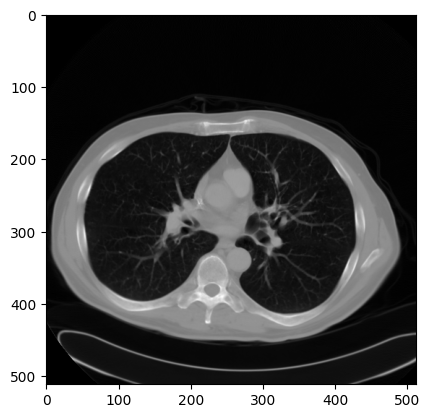

In [10]:
ct = dicom_file.pixel_array
plt.figure()
plt.imshow(ct, cmap='gray')
plt.show()

In [18]:
path_to_head_mri = Path("/content/dicom/")

In [19]:
all_files = list(path_to_head_mri.glob("*"))

In [20]:
all_files

[PosixPath('/content/dicom/ID_0065_AGE_0082_CONTRAST_0_CT.dcm'),
 PosixPath('/content/dicom/ID_0074_AGE_0074_CONTRAST_0_CT.dcm'),
 PosixPath('/content/dicom/ID_0081_AGE_0058_CONTRAST_0_CT.dcm'),
 PosixPath('/content/dicom/ID_0095_AGE_0071_CONTRAST_0_CT.dcm'),
 PosixPath('/content/dicom/ID_0036_AGE_0074_CONTRAST_1_CT.dcm'),
 PosixPath('/content/dicom/ID_0086_AGE_0073_CONTRAST_0_CT.dcm'),
 PosixPath('/content/dicom/ID_0043_AGE_0069_CONTRAST_1_CT.dcm'),
 PosixPath('/content/dicom/ID_0082_AGE_0047_CONTRAST_0_CT.dcm'),
 PosixPath('/content/dicom/ID_0056_AGE_0083_CONTRAST_0_CT.dcm'),
 PosixPath('/content/dicom/ID_0031_AGE_0039_CONTRAST_1_CT.dcm'),
 PosixPath('/content/dicom/ID_0034_AGE_0061_CONTRAST_1_CT.dcm'),
 PosixPath('/content/dicom/ID_0029_AGE_0078_CONTRAST_1_CT.dcm'),
 PosixPath('/content/dicom/ID_0058_AGE_0082_CONTRAST_0_CT.dcm'),
 PosixPath('/content/dicom/ID_0011_AGE_0061_CONTRAST_1_CT.dcm'),
 PosixPath('/content/dicom/ID_0050_AGE_0074_CONTRAST_0_CT.dcm'),
 PosixPath('/content/dico

In [25]:
mri_data = []

for path in all_files:
    path = Path(path)  # ensure it's a Path object
    if path.is_file() and path.suffix == '.dcm':
        data = pydicom.dcmread(path)
        mri_data.append(data)


In [26]:
for slice in mri_data[:5]:
  print(slice.SliceLocation)

-150
-214.500
-142
-154.250000
-321


In [27]:
mri_data_ordered = sorted(mri_data, key=lambda slice: slice.SliceLocation)

for slice in mri_data_ordered[:5]:
  print(slice.SliceLocation)

-1168.4
-948.5
-948.2
-918.5
-901


In [28]:
full_volume = []
for slice in mri_data_ordered:
  full_volume.append(slice.pixel_array)

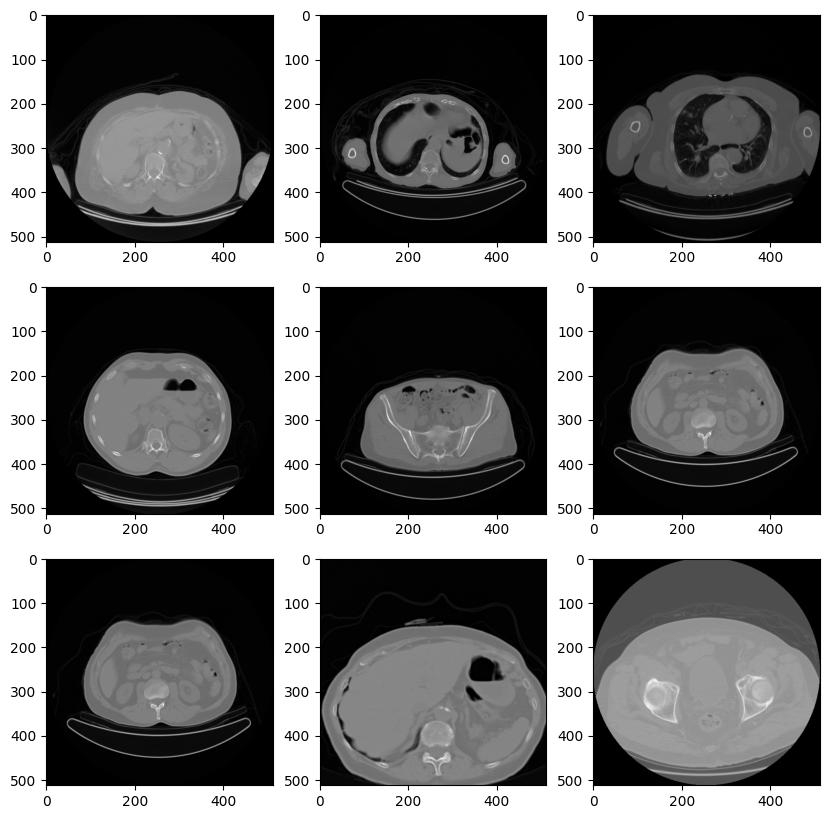

In [31]:
fig, axis = plt.subplots(3,3, figsize=(10,10))
slice_counter = 0
for i in range(3):
  for j in range(3):
    axis[i,j].imshow(full_volume[slice_counter], cmap='gray')
    # axis[i,j].axis('off')
    slice_counter += 1

In [32]:
!pip install SimpleITK

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.3/52.3 MB 8.4 MB/s eta 0:00:00


In [33]:
import SimpleITK as sitk

In [34]:
series_ids = sitk.ImageSeriesReader.GetGDCMSeriesIDs("/content/dicom/")
print(series_ids)

('1.3.6.1.4.1.14519.5.2.1.3023.4012.102289758600639081883682341599', '1.3.6.1.4.1.14519.5.2.1.3023.4012.111970507245102440072981773069', '1.3.6.1.4.1.14519.5.2.1.3023.4012.154470741269083988898569715734', '1.3.6.1.4.1.14519.5.2.1.3023.4012.251486101984782457779149100338', '1.3.6.1.4.1.14519.5.2.1.3023.4012.281222452204153314922270968637', '1.3.6.1.4.1.14519.5.2.1.3023.4012.297267439816180432188742253053', '1.3.6.1.4.1.14519.5.2.1.3023.4012.513523794062613324810980652054', '1.3.6.1.4.1.14519.5.2.1.3023.4012.648531603410109839170055154074', '1.3.6.1.4.1.14519.5.2.1.3023.4012.695837418985624676340861607694', '1.3.6.1.4.1.14519.5.2.1.6450.4012.153444090734536905415278769671', '1.3.6.1.4.1.14519.5.2.1.6450.4012.175016803370372621275285549100', '1.3.6.1.4.1.14519.5.2.1.6450.4012.185965196167856618864777448062', '1.3.6.1.4.1.14519.5.2.1.6450.4012.200234714530375524999580843628', '1.3.6.1.4.1.14519.5.2.1.6450.4012.249320450296411760831322037482', '1.3.6.1.4.1.14519.5.2.1.6450.4012.288687105792

In [35]:
series_file_names = sitk.ImageSeriesReader.GetGDCMSeriesFileNames("/content/dicom/", series_ids[0])
series_file_names

('/content/dicom/ID_0078_AGE_0066_CONTRAST_0_CT.dcm',)

In [36]:
series_reader = sitk.ImageSeriesReader()
series_reader.SetFileNames(series_file_names)

In [37]:
image_data = series_reader.Execute()

In [38]:
head_mri = sitk.GetArrayFromImage(image_data)

In [39]:
head_mri.shape

(1, 512, 512)

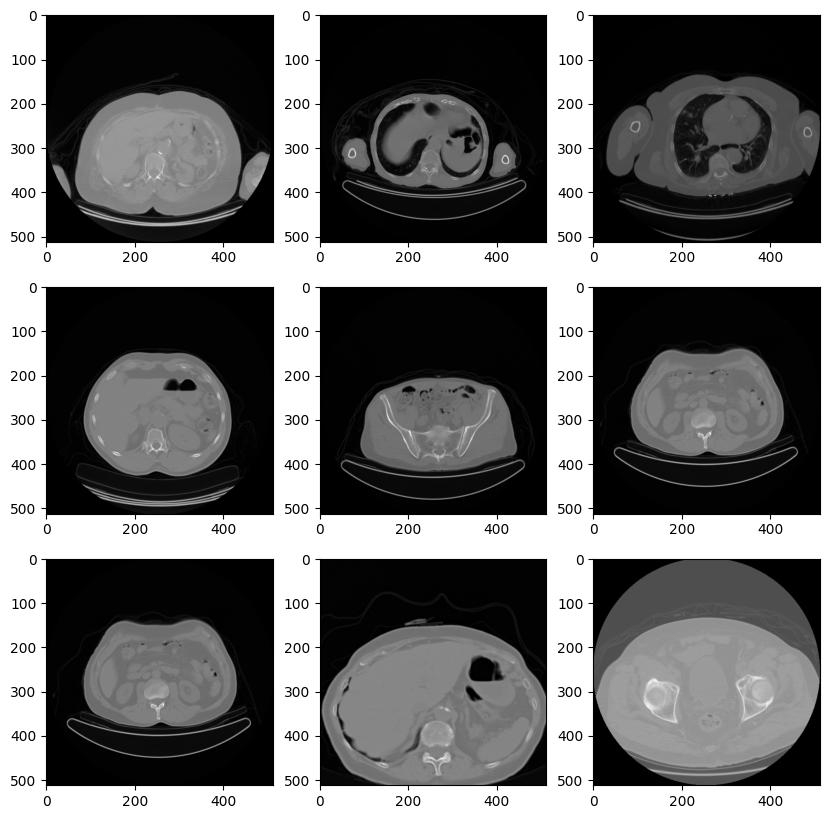

In [40]:
fig, axis = plt.subplots(3,3, figsize=(10,10))
slice_counter = 0
for i in range(3):
  for j in range(3):
    axis[i,j].imshow(full_volume[slice_counter], cmap='gray')
    # axis[i,j].axis('off')
    slice_counter += 1

In [41]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np


In [43]:
!pip install dicom2nifti


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 88.3 MB/s eta 0:00:00


In [45]:
import pydicom
import os

for filename in os.listdir("/content/dicom"):
    if filename.endswith(".dcm"):
        dicom_file = pydicom.dcmread(os.path.join("/content/dicom", filename))
        print(f"File: {filename}, Image Type: {dicom_file.get('ImageType')}, Series Description: {dicom_file.get('SeriesDescription')}")


File: ID_0065_AGE_0082_CONTRAST_0_CT.dcm, Image Type: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI'], Series Description: CHEST ROUTINE  2.0  B20f
File: ID_0074_AGE_0074_CONTRAST_0_CT.dcm, Image Type: ['ORIGINAL', 'PRIMARY', 'AXIAL'], Series Description: Recon 3: CHEST-.8
File: ID_0081_AGE_0058_CONTRAST_0_CT.dcm, Image Type: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI'], Series Description: CT WB 5.0 B31f
File: ID_0095_AGE_0071_CONTRAST_0_CT.dcm, Image Type: ['ORIGINAL', 'PRIMARY', 'AXIAL'], Series Description: INSPIRATION
File: ID_0036_AGE_0074_CONTRAST_1_CT.dcm, Image Type: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI'], Series Description: CHEST ROUTINE  3.0  B20f
File: ID_0086_AGE_0073_CONTRAST_0_CT.dcm, Image Type: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI'], Series Description: CT WB FUSION
File: ID_0043_AGE_0069_CONTRAST_1_CT.dcm, Image Type: ['ORIGINAL', 'PRIMARY', 'AXIAL'], Series Description: PE STUDY ST
File: ID_0082_AGE_0047_CONTRAST_0_CT.dcm, Image Type: ['ORIGINAL

In [49]:
import dicom2nifti
import os
dicom_folder = '/content/dicom'
output_folder = '/content/nifti'
dicom2nifti.convert_directory(dicom_folder, output_folder)

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_dir.py", line 86, in convert_directory
    convert_dicom.dicom_array_to_nifti(dicom_input, nifti_file, reorient)
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_dicom.py", line 119, in dicom_array_to_nifti
    results = convert_generic.dicom_to_nifti(dicom_list, output_file)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_generic.py", line 230, in dicom_to_nifti
    common.validate_slicecount(dicom_input)
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/common.py", line 1003, in validate_slicecount
    raise ConversionValidationError('TOO_FEW_SLICES/LOCALIZER')
dicom2nifti.exceptions.ConversionValidationError: TOO_FEW_SLICES/LOCALIZER
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_dir.py", line 86, in convert_d

In [51]:
import pydicom
import os

for filename in os.listdir("/content/dicom"):
    if filename.endswith(".dcm"):
        dicom_path = os.path.join("/content/dicom", filename)
        dicom_file = pydicom.dcmread(dicom_path)

        image_type = dicom_file.get('ImageType', 'N/A')
        # Use .get() and convert to string safely
        try:
            series_description = dicom_file.get('SeriesDescription', 'N/A')
        except Exception as e:
            series_description = f"[Error decoding SeriesDescription: {e}]"

        print(f"File: {filename}, Image Type: {image_type}, Series Description: {str(series_description).encode('utf-8', errors='replace').decode('utf-8')}")



File: ID_0065_AGE_0082_CONTRAST_0_CT.dcm, Image Type: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI'], Series Description: CHEST ROUTINE  2.0  B20f
File: ID_0074_AGE_0074_CONTRAST_0_CT.dcm, Image Type: ['ORIGINAL', 'PRIMARY', 'AXIAL'], Series Description: Recon 3: CHEST-.8
File: ID_0081_AGE_0058_CONTRAST_0_CT.dcm, Image Type: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI'], Series Description: CT WB 5.0 B31f
File: ID_0095_AGE_0071_CONTRAST_0_CT.dcm, Image Type: ['ORIGINAL', 'PRIMARY', 'AXIAL'], Series Description: INSPIRATION
File: ID_0036_AGE_0074_CONTRAST_1_CT.dcm, Image Type: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI'], Series Description: CHEST ROUTINE  3.0  B20f
File: ID_0086_AGE_0073_CONTRAST_0_CT.dcm, Image Type: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI'], Series Description: CT WB FUSION
File: ID_0043_AGE_0069_CONTRAST_1_CT.dcm, Image Type: ['ORIGINAL', 'PRIMARY', 'AXIAL'], Series Description: PE STUDY ST
File: ID_0082_AGE_0047_CONTRAST_0_CT.dcm, Image Type: ['ORIGINAL

In [52]:
import dicom2nifti
import os
dicom_folder = '/content/dicom'
output_folder = '/content/nifti'
dicom2nifti.convert_directory(dicom_folder, output_folder)

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_dir.py", line 86, in convert_directory
    convert_dicom.dicom_array_to_nifti(dicom_input, nifti_file, reorient)
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_dicom.py", line 119, in dicom_array_to_nifti
    results = convert_generic.dicom_to_nifti(dicom_list, output_file)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_generic.py", line 230, in dicom_to_nifti
    common.validate_slicecount(dicom_input)
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/common.py", line 1003, in validate_slicecount
    raise ConversionValidationError('TOO_FEW_SLICES/LOCALIZER')
dicom2nifti.exceptions.ConversionValidationError: TOO_FEW_SLICES/LOCALIZER
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/dicom2nifti/convert_dir.py", line 86, in convert_d

In [53]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

In [55]:
brain_mri = nib.load("/slice.nii")
brain_mri_data = brain_mri.get_fdata()


In [56]:
affine = brain_mri.affine
shape = brain_mri.shape

In [57]:
print(affine)

[[-1.00000000e+00  0.00000000e+00  7.04487467e-16  2.55500000e+02]
 [-7.04487467e-16  0.00000000e+00 -1.00000000e+00  1.40000000e+02]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00 -1.31800000e+03]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [58]:
shape

(512, 512, 1)

In [59]:
brain_mri.header.get_zooms()

(np.float32(1.0), np.float32(1.0), np.float32(1.0))

In [60]:
nib.aff2axcodes(affine)

('L', 'S', 'P')

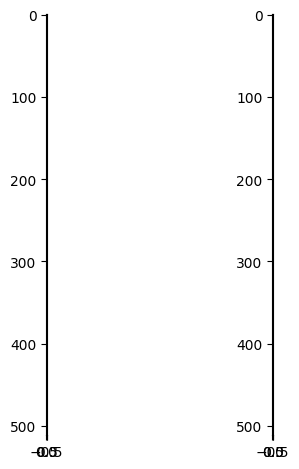

In [65]:
fig, axis = plt.subplots(1,2)
axis[0].imshow(brain_mri_data[40, :, :], cmap='gray')
axis[1].imshow(brain_mri_data[120, :, :], cmap='gray')

plt.tight_layout()
plt.show()

NIfTI shape: (512, 512, 1)
Data type: float64


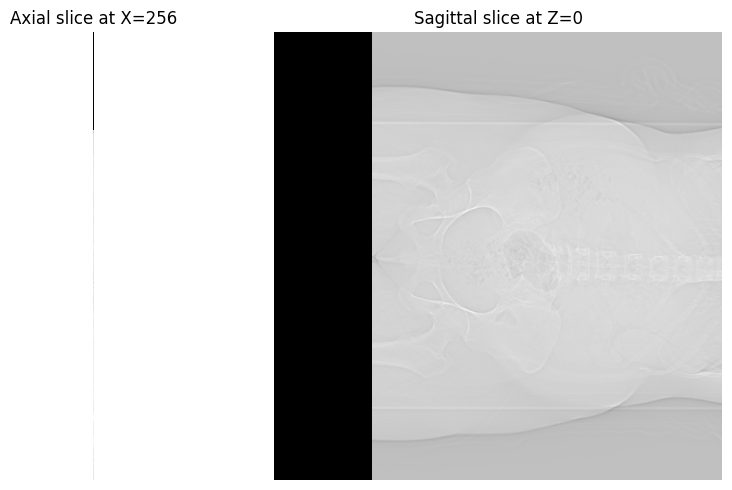

In [66]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

# Load your NIfTI file (update path if different)
nifti_file = '/slice.nii'  # <-- replace with your actual file path
img = nib.load(nifti_file)
data = img.get_fdata()

# Check data shape and dtype
print("NIfTI shape:", data.shape)
print("Data type:", data.dtype)

# Check middle slices in one axis (update index ranges based on actual shape)
slice_1 = data.shape[0] // 2
slice_2 = data.shape[2] // 2

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(data[slice_1, :, :], cmap='gray')
ax[0].set_title(f"Axial slice at X={slice_1}")
ax[0].axis('off')

ax[1].imshow(data[:, :, slice_2], cmap='gray')
ax[1].set_title(f"Sagittal slice at Z={slice_2}")
ax[1].axis('off')

plt.tight_layout()
plt.show()


##  Resampling

In [67]:
print(brain_mri.shape)
print(brain_mri.header.get_zooms())

(512, 512, 1)
(np.float32(1.0), np.float32(1.0), np.float32(1.0))


In [69]:
import nibabel.processing

In [72]:
voxel_size = (2,2,2)
brain_mri_resized = nibabel.processing.conform(brain_mri, (128, 128, 100), voxel_size, orientation="PSR")
brain_mri_resized_data = brain_mri_resized.get_fdata()

In [73]:
print(brain_mri_resized.shape)
print(brain_mri_resized.header.get_zooms())

(128, 128, 100)
(np.float32(2.0), np.float32(2.0), np.float32(2.0))


IndexError: index 50 is out of bounds for axis 2 with size 1

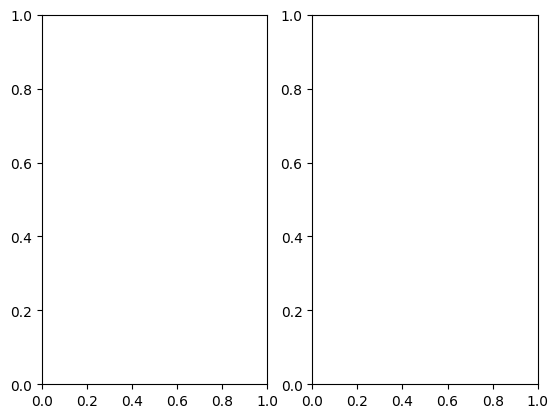

In [74]:
fig, axis = plt.subplots(1,2)
axis[0].imshow(brain_mri_data[:, :, 50], cmap='gray')
axis[1].imshow(brain_mri_resized_data[:, :, 50], cmap='gray')

## Normalization and standardization